In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [170]:
def plot_ganancias_curva(df):
    def add_zip(x):
        return [i for i in zip(range(5000, 15001, 1000), ast.literal_eval(x))]

    df['ganancia_custom_with_sent'] = df['ganancia_custom'].apply(add_zip)
    plot_df = pd.DataFrame(columns=['x', 'y', 'seed'])
    
    for model in df['model'].unique():
           
    
        series = df[df['model'] == model]['ganancia_custom_with_sent']
        for idx, row in enumerate(series):
            temp_df = pd.DataFrame(row, columns=['x', 'y'])
            temp_df['Model Run'] = idx
            plot_df = pd.concat([plot_df, temp_df])
        plot_df[['x', 'Model Run']] = plot_df[['x', 'Model Run']].apply(pd.to_numeric)
        fig, ax = plt.subplots()
        formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
        ax.yaxis.set_major_formatter(formatter)
        sns.lineplot(data=plot_df, x='x', y='y', hue='Model Run', palette='tab10', ax=ax)
        plt.show()
        
        
def analisis(df_x, n_dataset):
    
    df = df_x.copy()   
    
    fig, axs = plt.subplots(4, 1, figsize=(10, 20)) 
    scaler = StandardScaler()
    
    scores = evaluation_metrics

    for i, score in enumerate(scores):
        if score == 'ganancia_custom':    
            df[score] = df[score].apply(lambda x: sum(ast.literal_eval(x)))     
        df[score] = scaler.fit_transform(df[[score]])    
        df_grouped = df.groupby(['model', 'seed'])[score].mean().unstack(level=0) 
        df_grouped.plot(ax=axs[i], marker='o')
        axs[i].set_title(f'Standardized {score} by model and seed')
        axs[i].set_xlabel('Seed')
        axs[i].set_ylabel('Standardized ' + score)
        axs[i].legend(title='Model')

    plt.tight_layout()
    plt.show()
    
    
def spearman(df):
    serie_hpo = df[df['model'] == 'LightGBMHPO']
    
    models_vs = df['model'].unique().tolist()
    models_vs.remove('LightGBMHPO')

    results = {}
    for metric in evaluation_metrics:
        metric_results = {}
        for model in models_vs:
            serie_2 = df[df['model'] == model]
            res = spearmanr(serie_hpo[metric], serie_2[metric])
            metric_results[(model, 'sp_correlation')] = res[0]
            metric_results[(model, 'p-value')] = res[1]
        results[metric] = metric_results

    df_results = pd.DataFrame(results).T
    df_results.columns = pd.MultiIndex.from_tuples(df_results.columns, names=['model', 'value'])    
    return df_results

In [ ]:
evaluation_metrics = ['f1_score', 'mcc', 'auc', 'ganancia_custom']

In [167]:
df = pd.read_csv(f'../experiments/exp_results/exp_results_exp_experimento_1.csv')
df = df.drop('Unnamed: 0',axis=1)

In [185]:
def all_datasets(rango):    
    for i in range(*rango):        
        df = pd.read_csv(f'../experiments/exp_results/exp_results_exp_experimento_{i}.csv')
        df = df.drop('Unnamed: 0',axis=1)
        analisis(df, str(i))
        #plot_ganancias_curva(df)
        display(spearman(df))

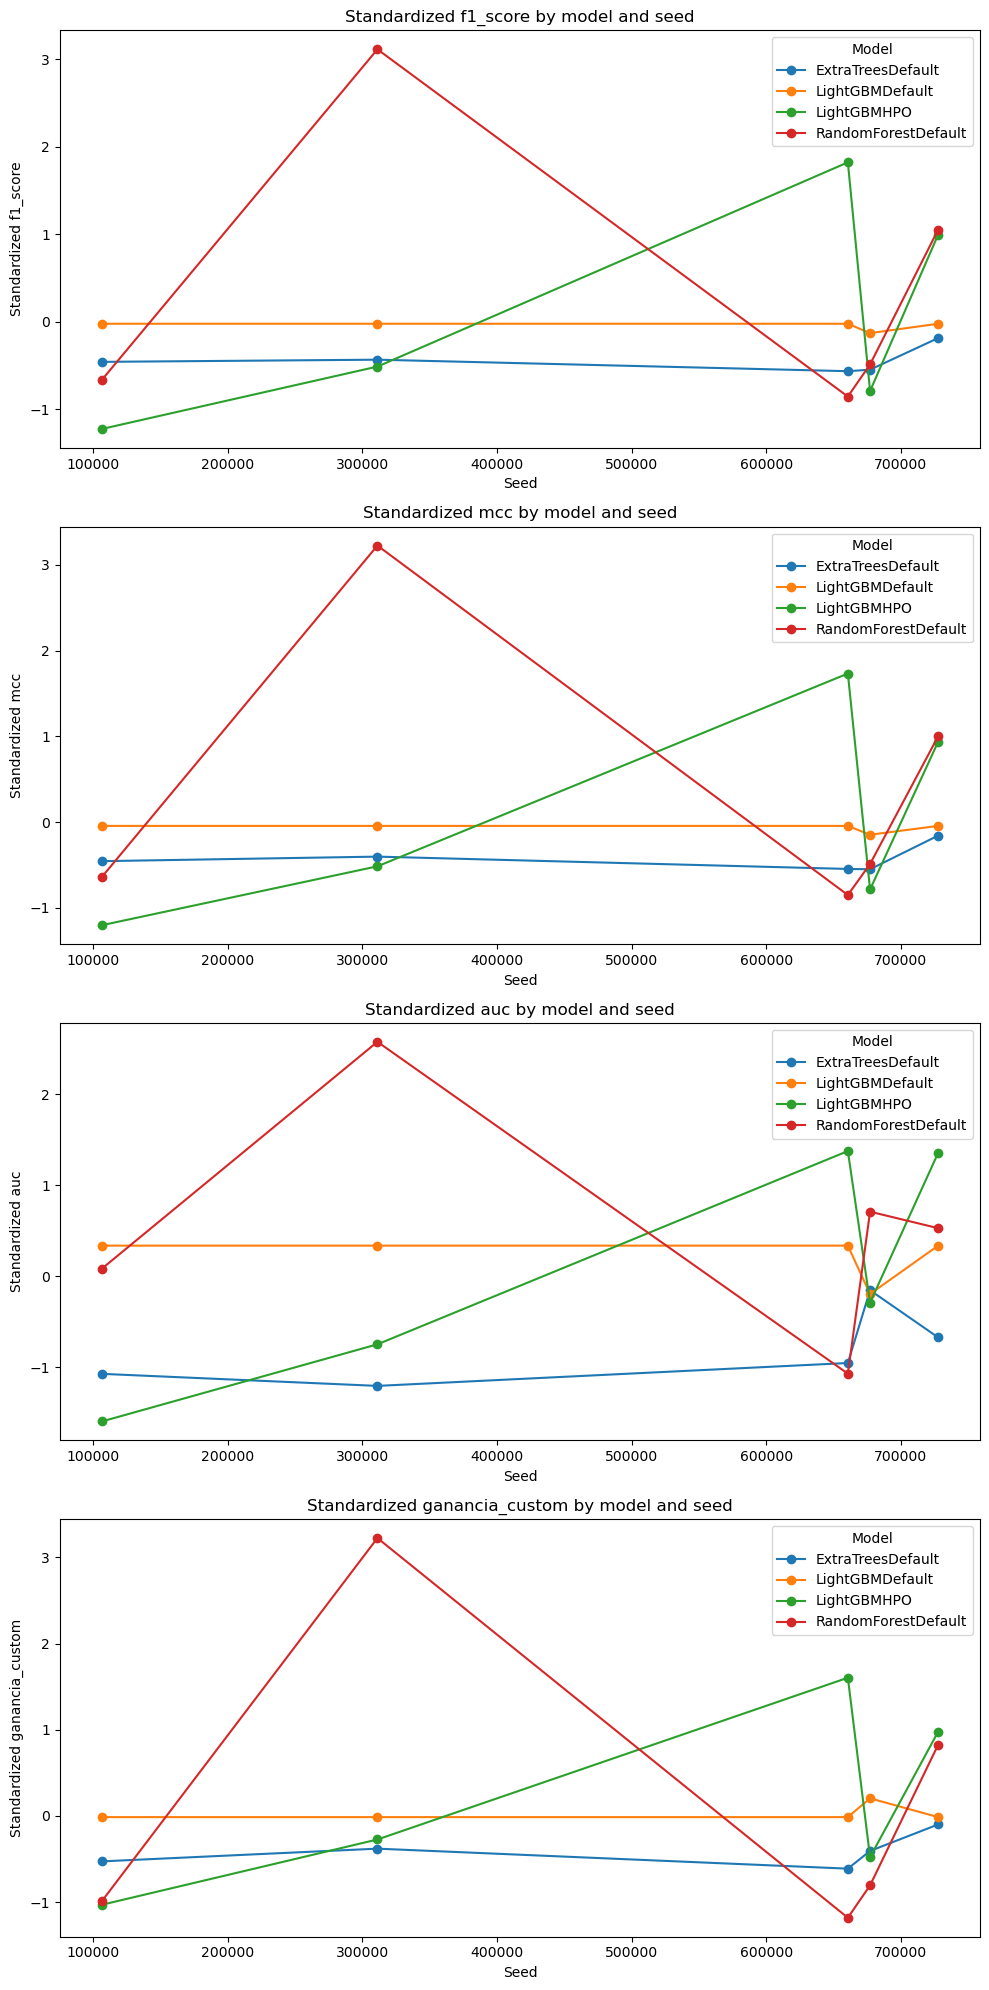

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score               0.353553  0.559404              -0.1  0.872889   
mcc                    0.353553  0.559404               0.2  0.747060   
auc                    0.000000  1.000000               0.5  0.391002   
ganancia_custom        0.353553  0.559404              -0.2  0.747060   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                       -0.1  0.872889  
mcc                            -0.1  0.872889  
auc                            -0.4  0.504632  
ganancia_custom                 0.2  0.747060

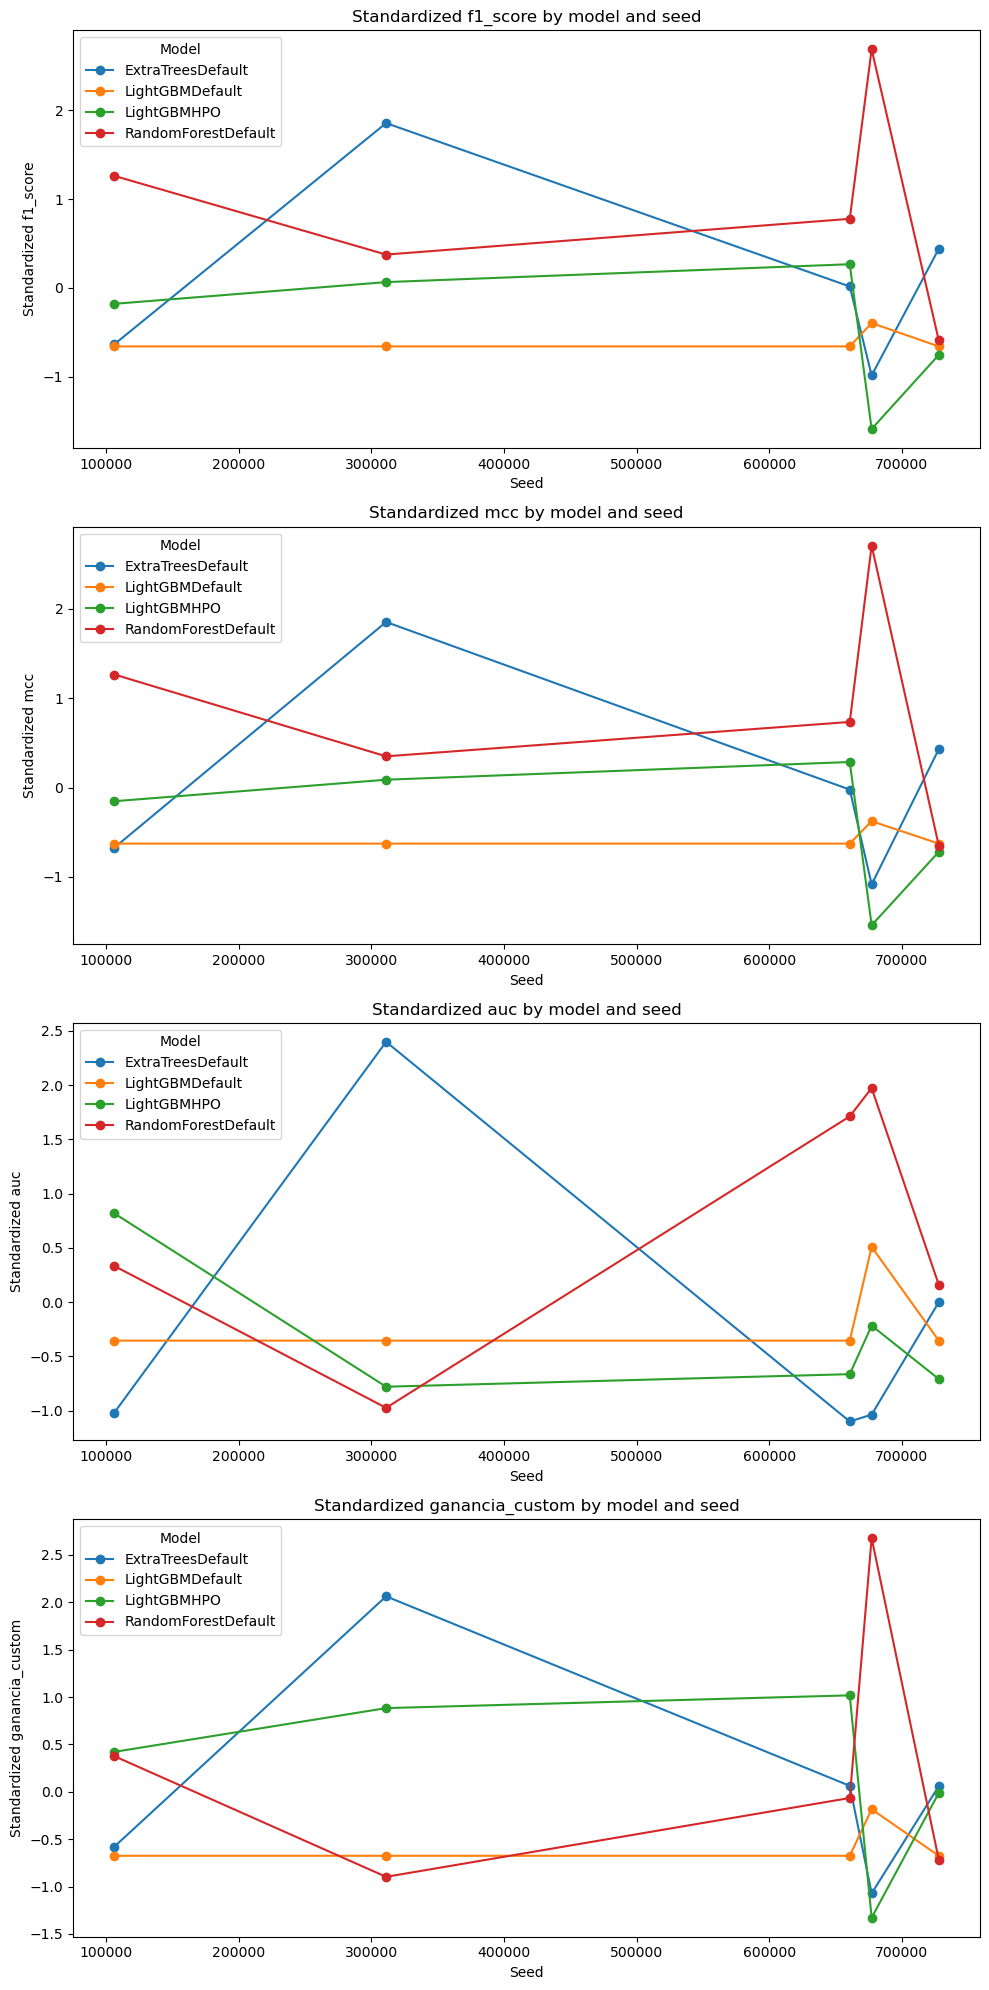

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score              -0.707107  0.181690               0.5  0.391002   
mcc                   -0.707107  0.181690               0.5  0.391002   
auc                    0.353553  0.559404              -0.6  0.284757   
ganancia_custom        0.707107  0.181690               0.5  0.391002   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                       -0.3  0.623838  
mcc                            -0.3  0.623838  
auc                             0.7  0.188120  
ganancia_custom                -0.1  0.872889

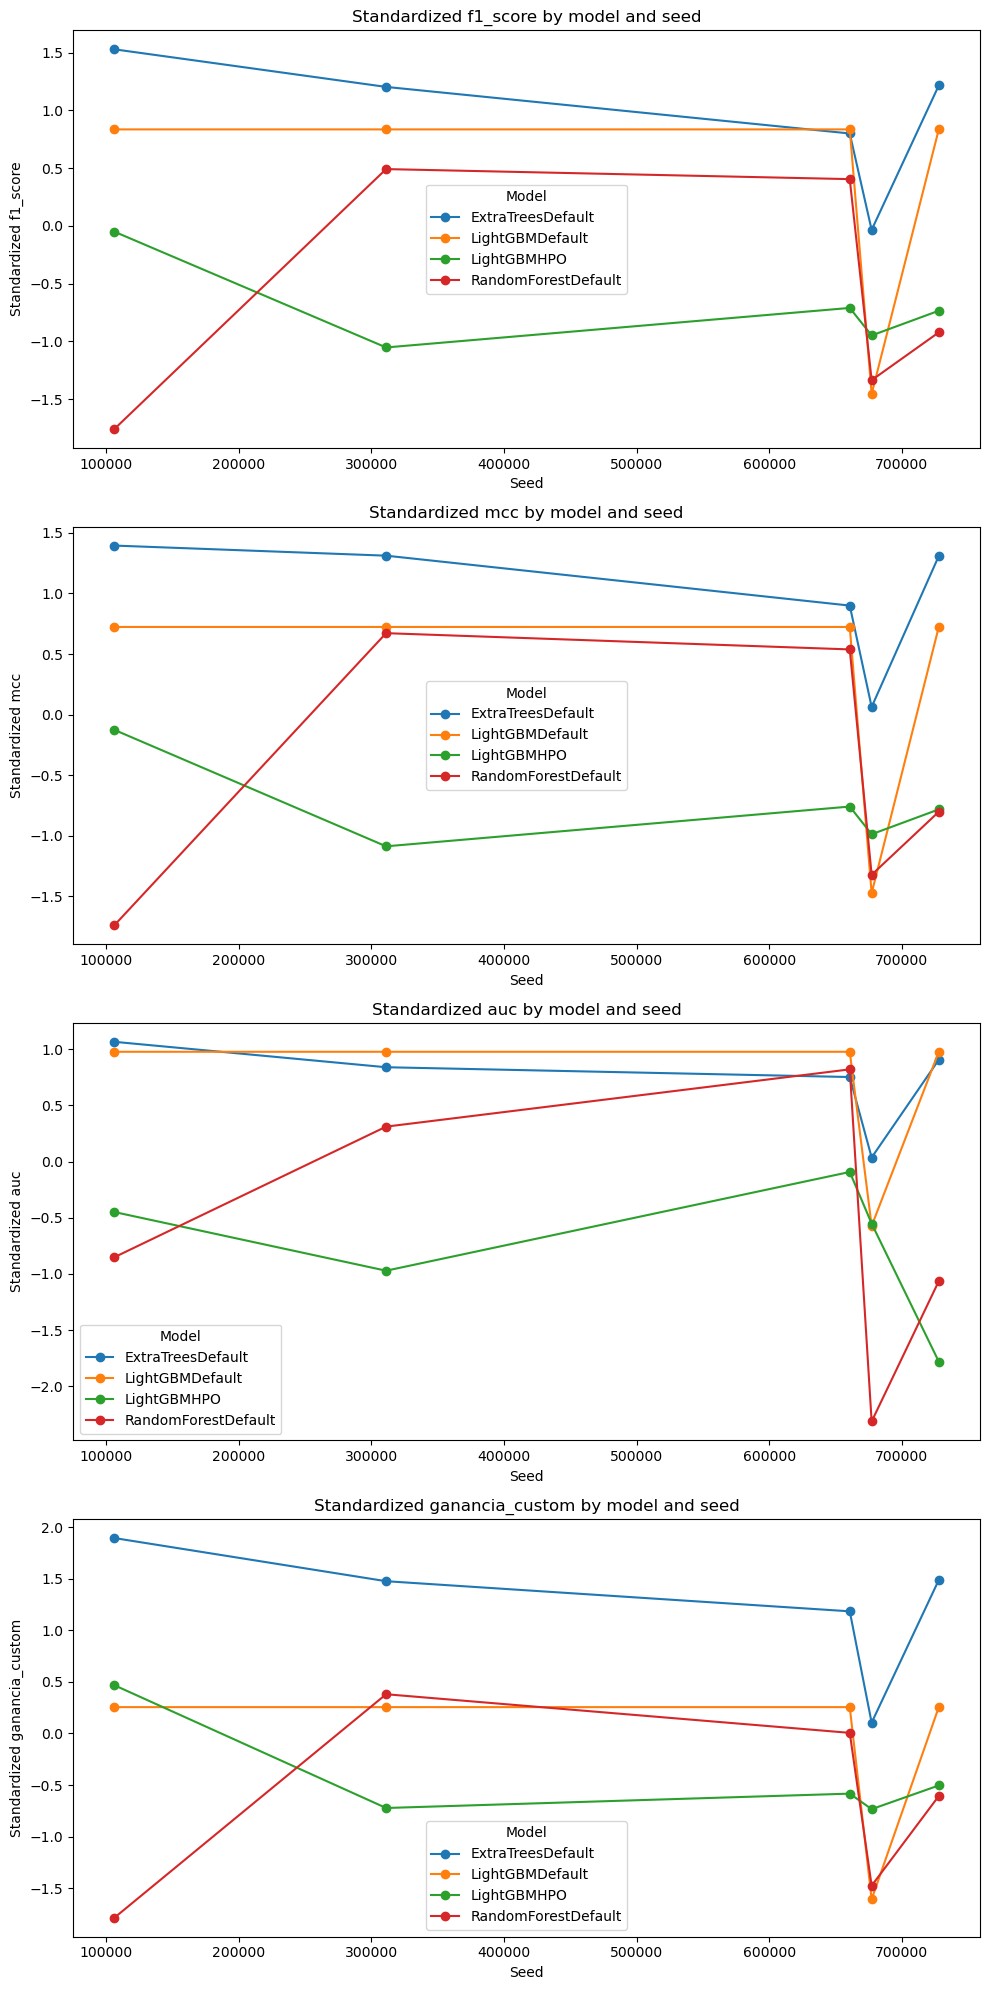

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score               0.353553  0.559404               0.5  0.391002   
mcc                    0.353553  0.559404               0.3  0.623838   
auc                    0.000000  1.000000              -0.2  0.747060   
ganancia_custom        0.353553  0.559404              -0.8  0.104088   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                       -0.6  0.284757  
mcc                            -0.6  0.284757  
auc                             0.5  0.391002  
ganancia_custom                 0.7  0.188120

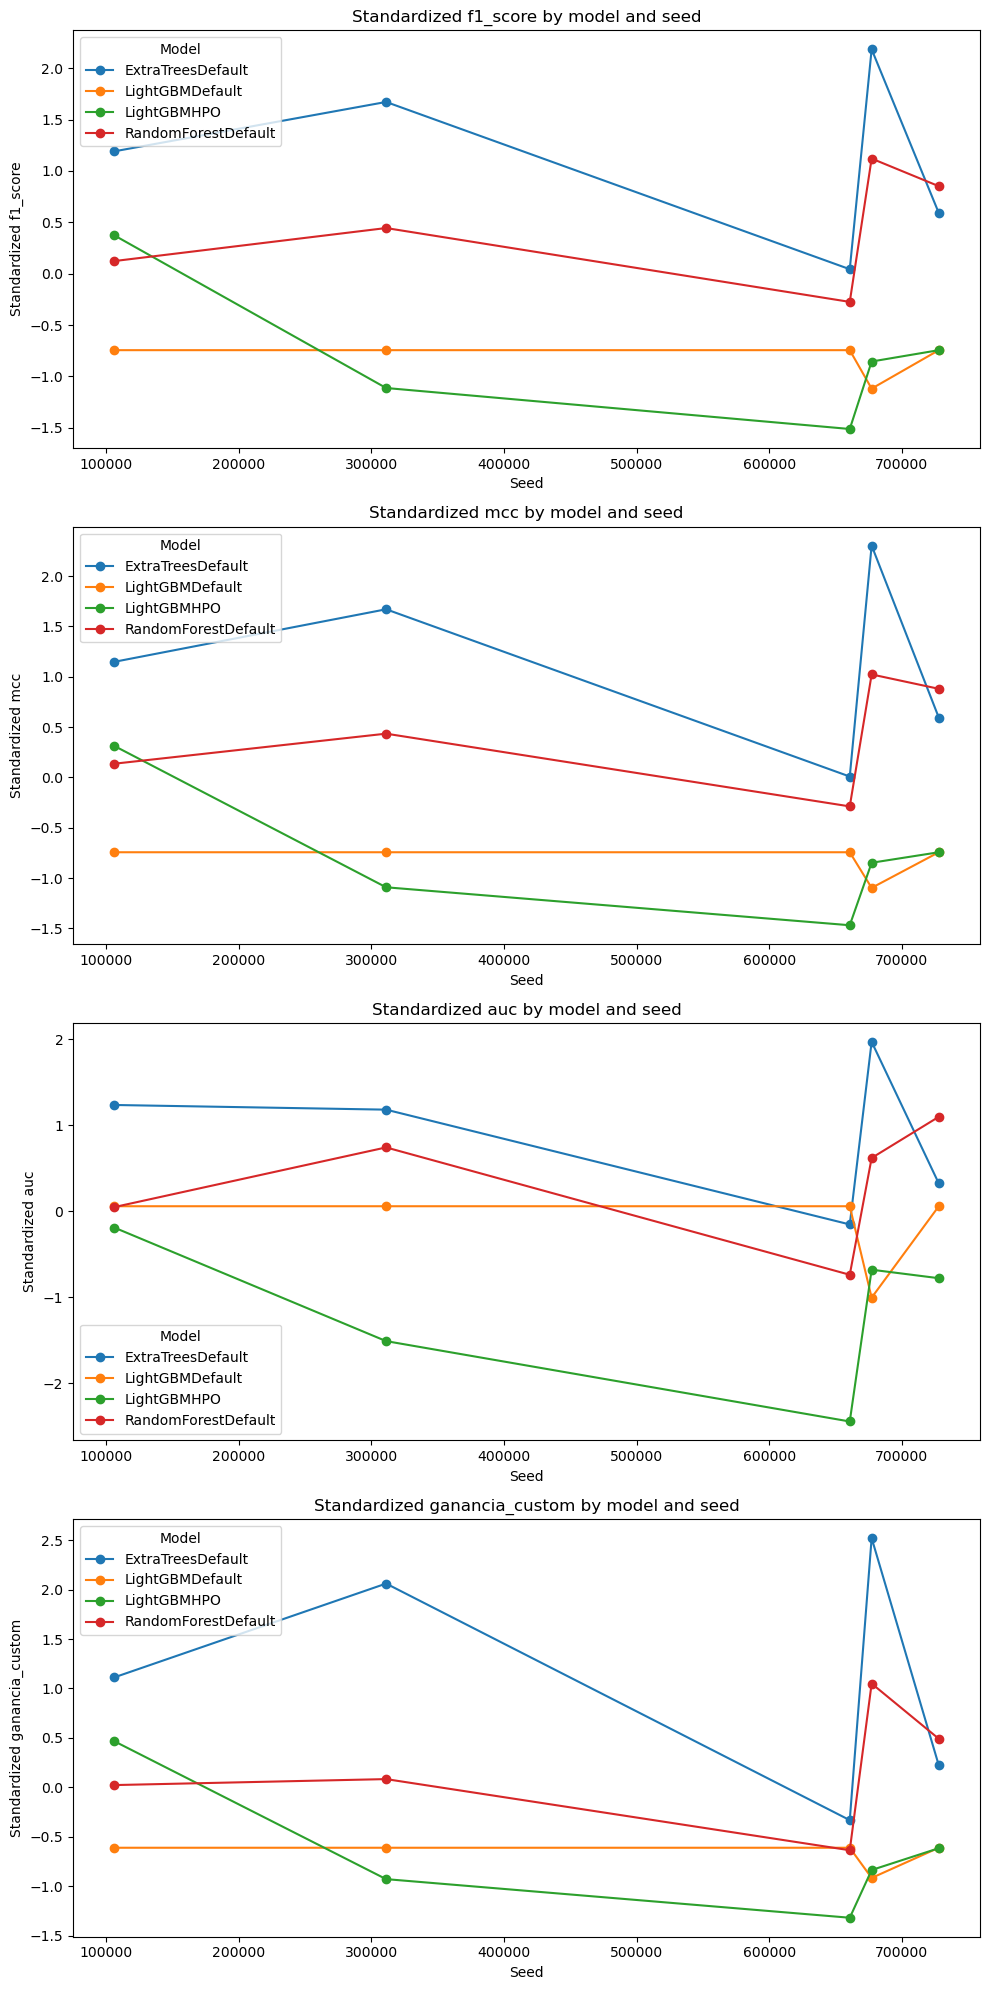

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score               0.000000  1.000000               0.2  0.747060   
mcc                    0.000000  1.000000               0.2  0.747060   
auc                   -0.353553  0.559404               0.8  0.104088   
ganancia_custom        0.353553  0.559404               0.5  0.391002   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                        0.3  0.623838  
mcc                             0.3  0.623838  
auc                             0.1  0.872889  
ganancia_custom                -0.3  0.623838

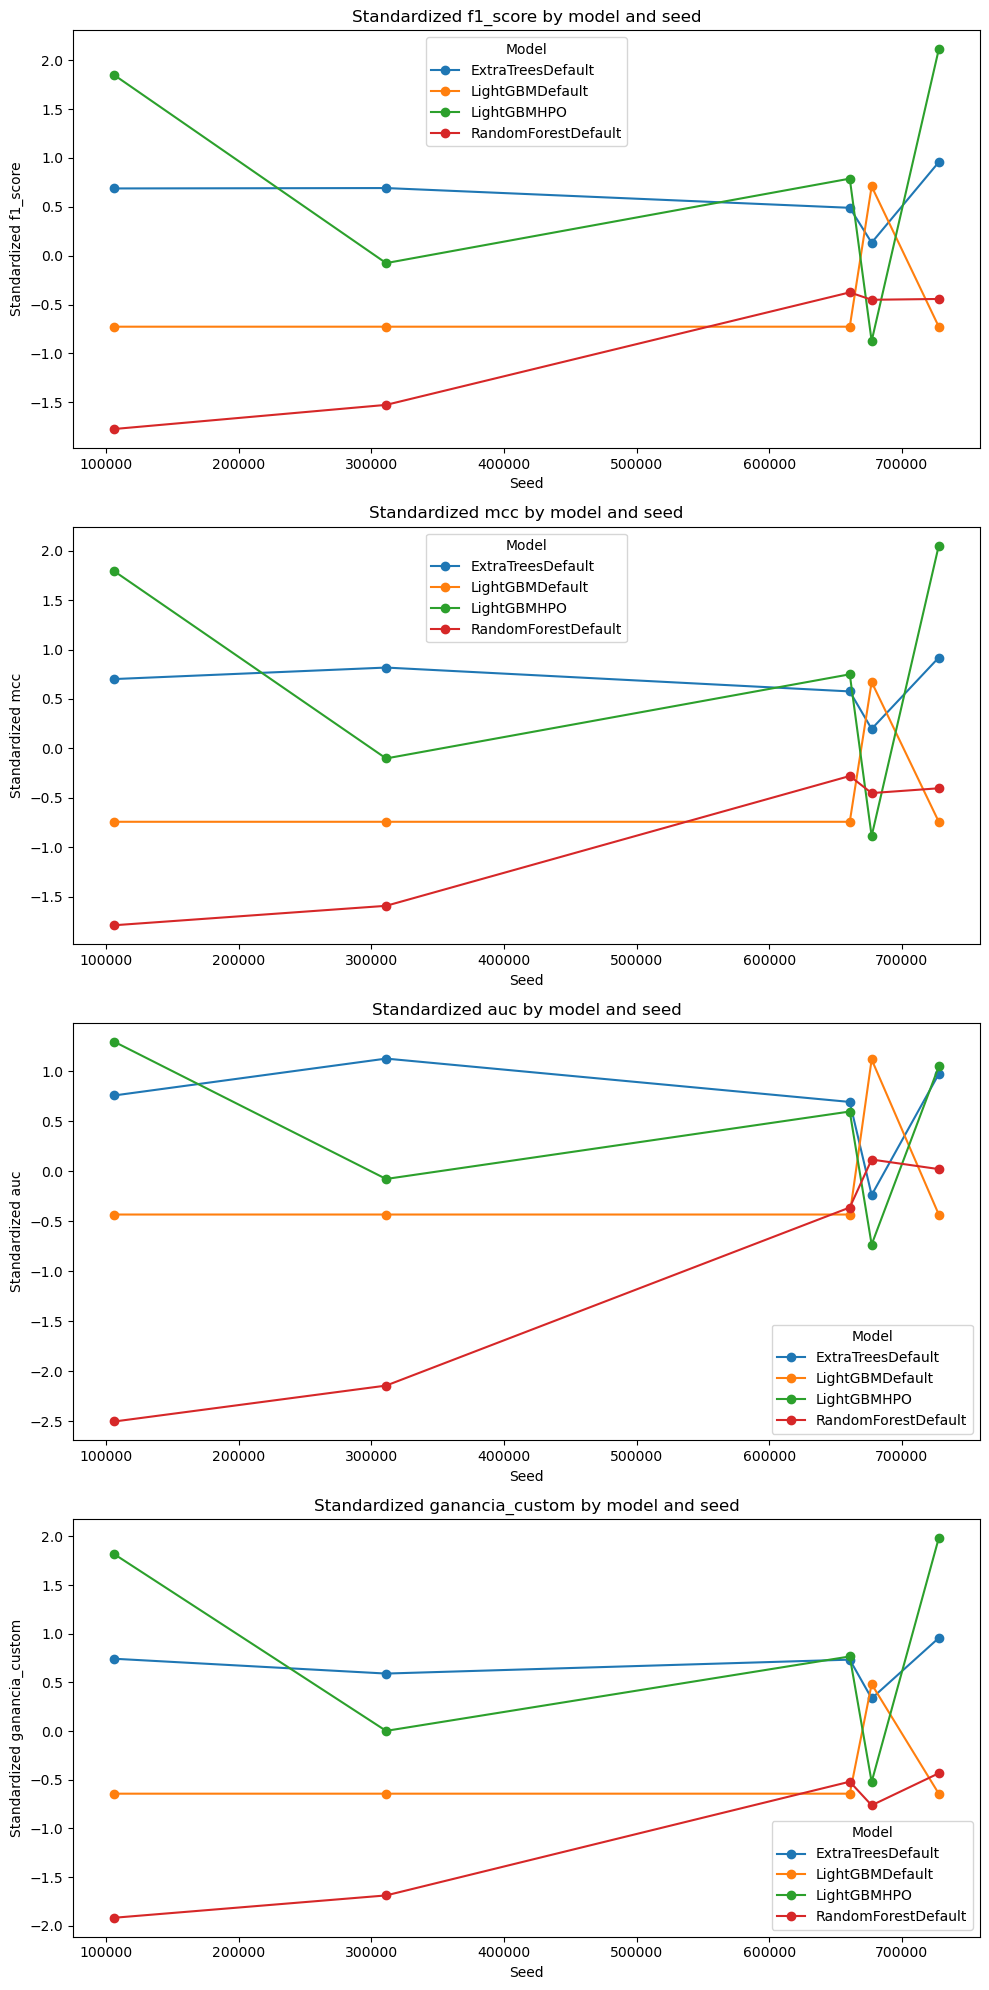

model           LightGBMDefault          ExtraTreesDefault            \
value            sp_correlation  p-value    sp_correlation   p-value   
f1_score              -0.707107  0.18169               0.7  0.188120   
mcc                   -0.707107  0.18169               0.7  0.188120   
auc                   -0.707107  0.18169               0.3  0.623838   
ganancia_custom       -0.707107  0.18169              -0.5  0.391002   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                        0.1  0.872889  
mcc                             0.1  0.872889  
auc                            -0.6  0.284757  
ganancia_custom                -0.6  0.284757

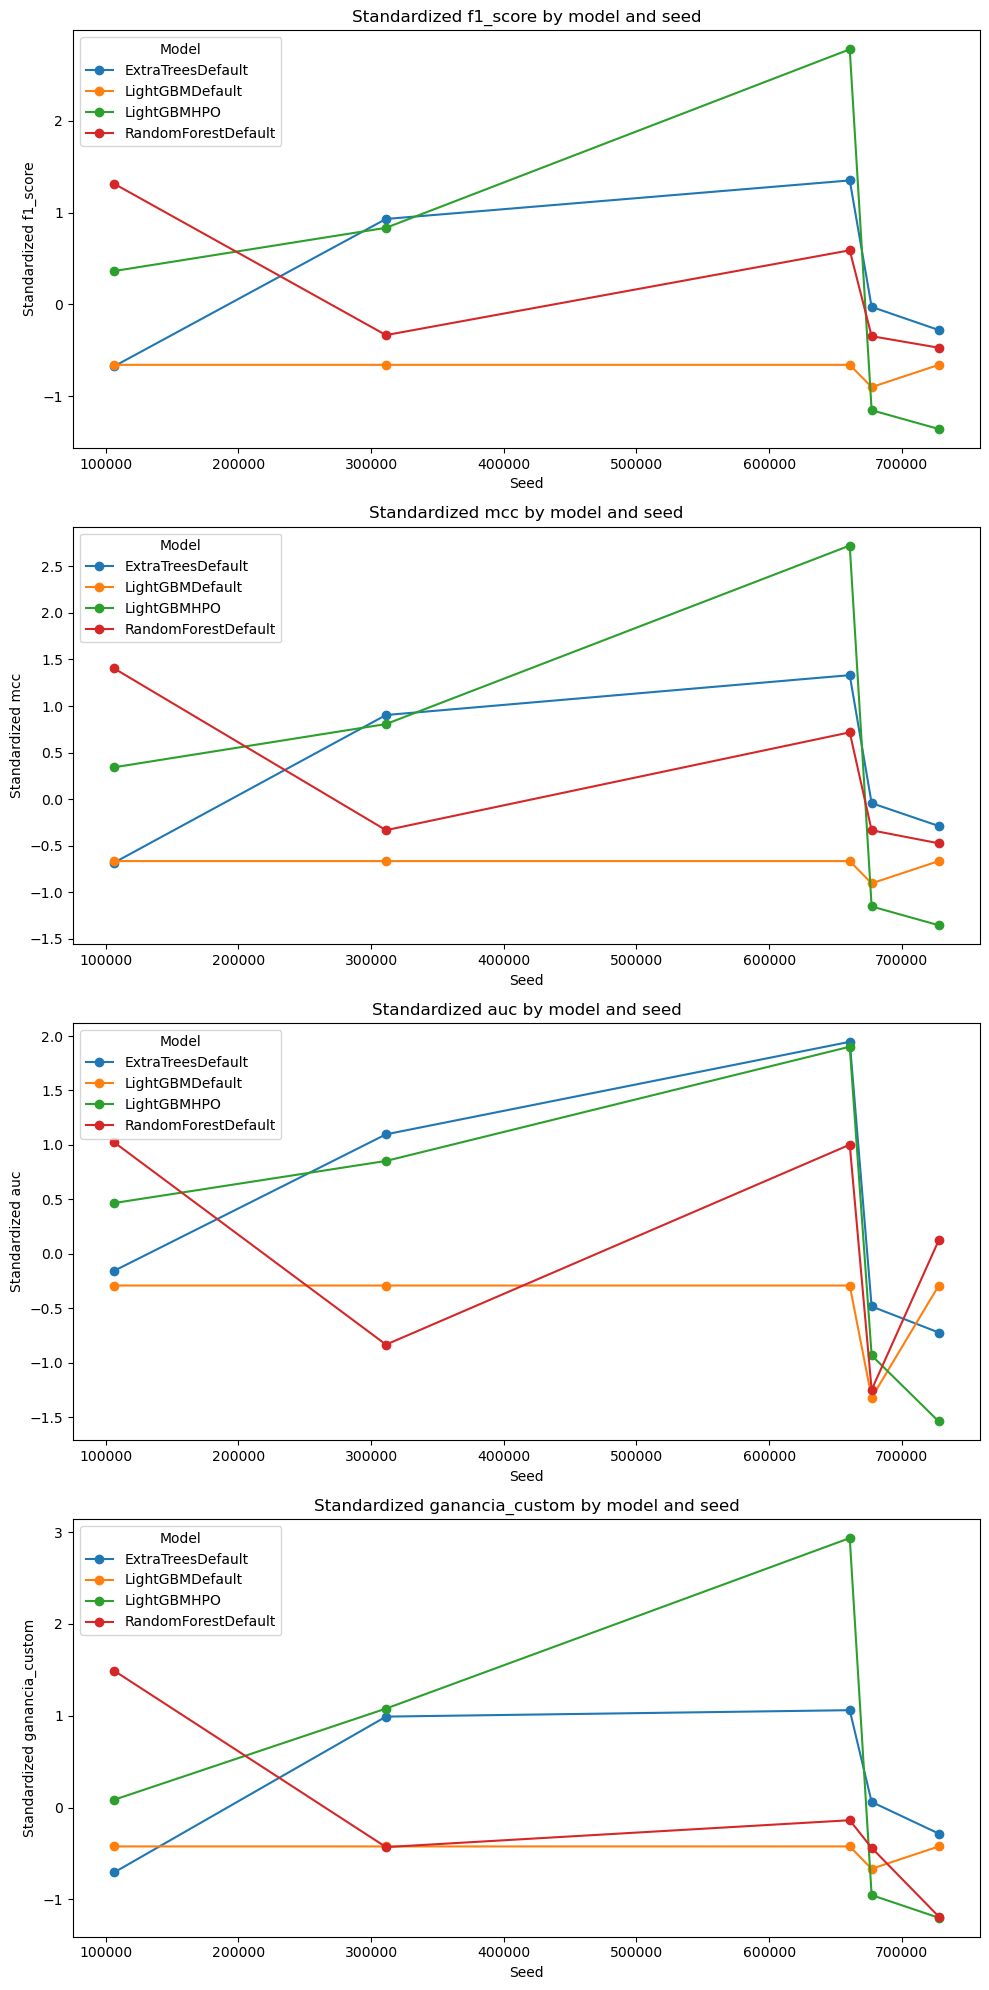

model           LightGBMDefault           ExtraTreesDefault                \
value            sp_correlation   p-value    sp_correlation       p-value   
f1_score               0.353553  0.559404               0.7  1.881204e-01   
mcc                    0.353553  0.559404               0.7  1.881204e-01   
auc                    0.353553  0.559404               1.0  1.404265e-24   
ganancia_custom       -0.707107  0.181690               0.6  2.847570e-01   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                        0.7  0.188120  
mcc                             0.7  0.188120  
auc                             0.3  0.623838  
ganancia_custom                 0.6  0.284757

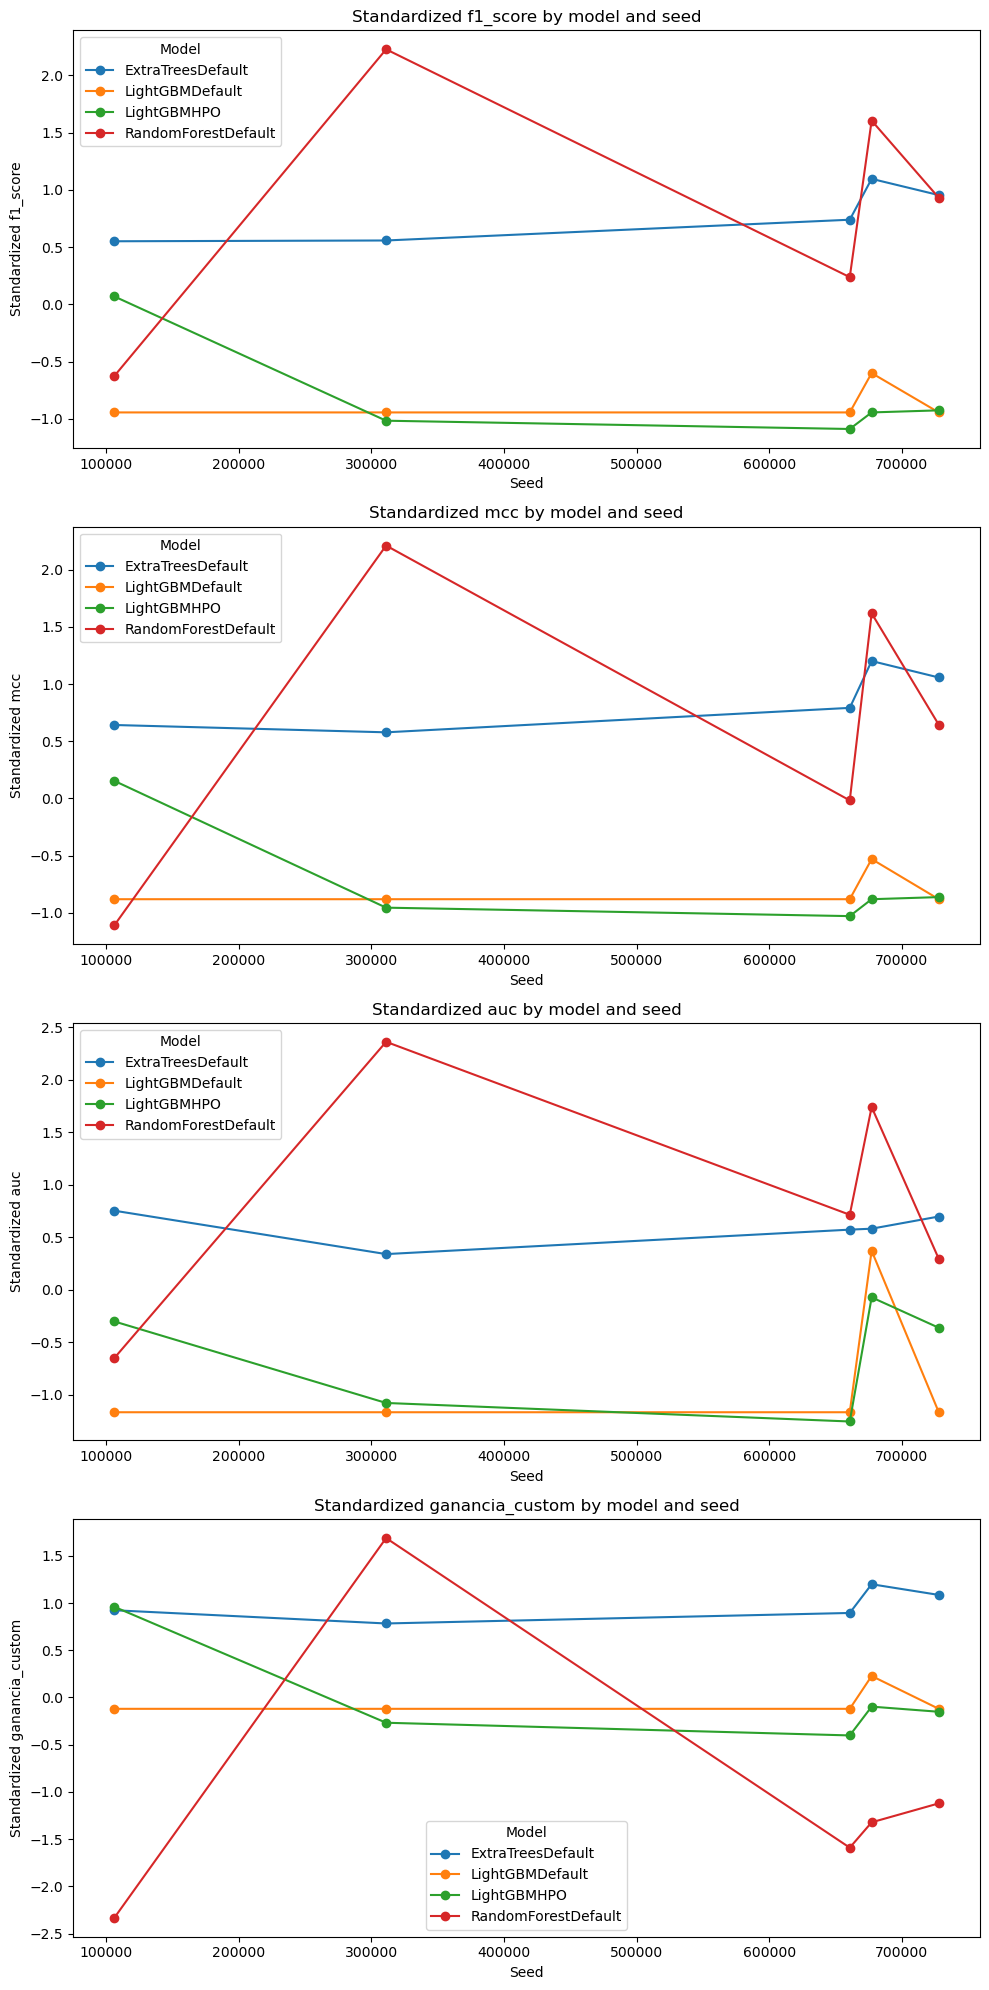

model           LightGBMDefault          ExtraTreesDefault            \
value            sp_correlation  p-value    sp_correlation   p-value   
f1_score               0.000000  1.00000              -0.2  0.747060   
mcc                    0.000000  1.00000               0.1  0.872889   
auc                    0.707107  0.18169               0.6  0.284757   
ganancia_custom        0.000000  1.00000               0.6  0.284757   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                       -0.4  0.504632  
mcc                            -0.4  0.504632  
auc                            -0.2  0.747060  
ganancia_custom                 0.9  0.037386

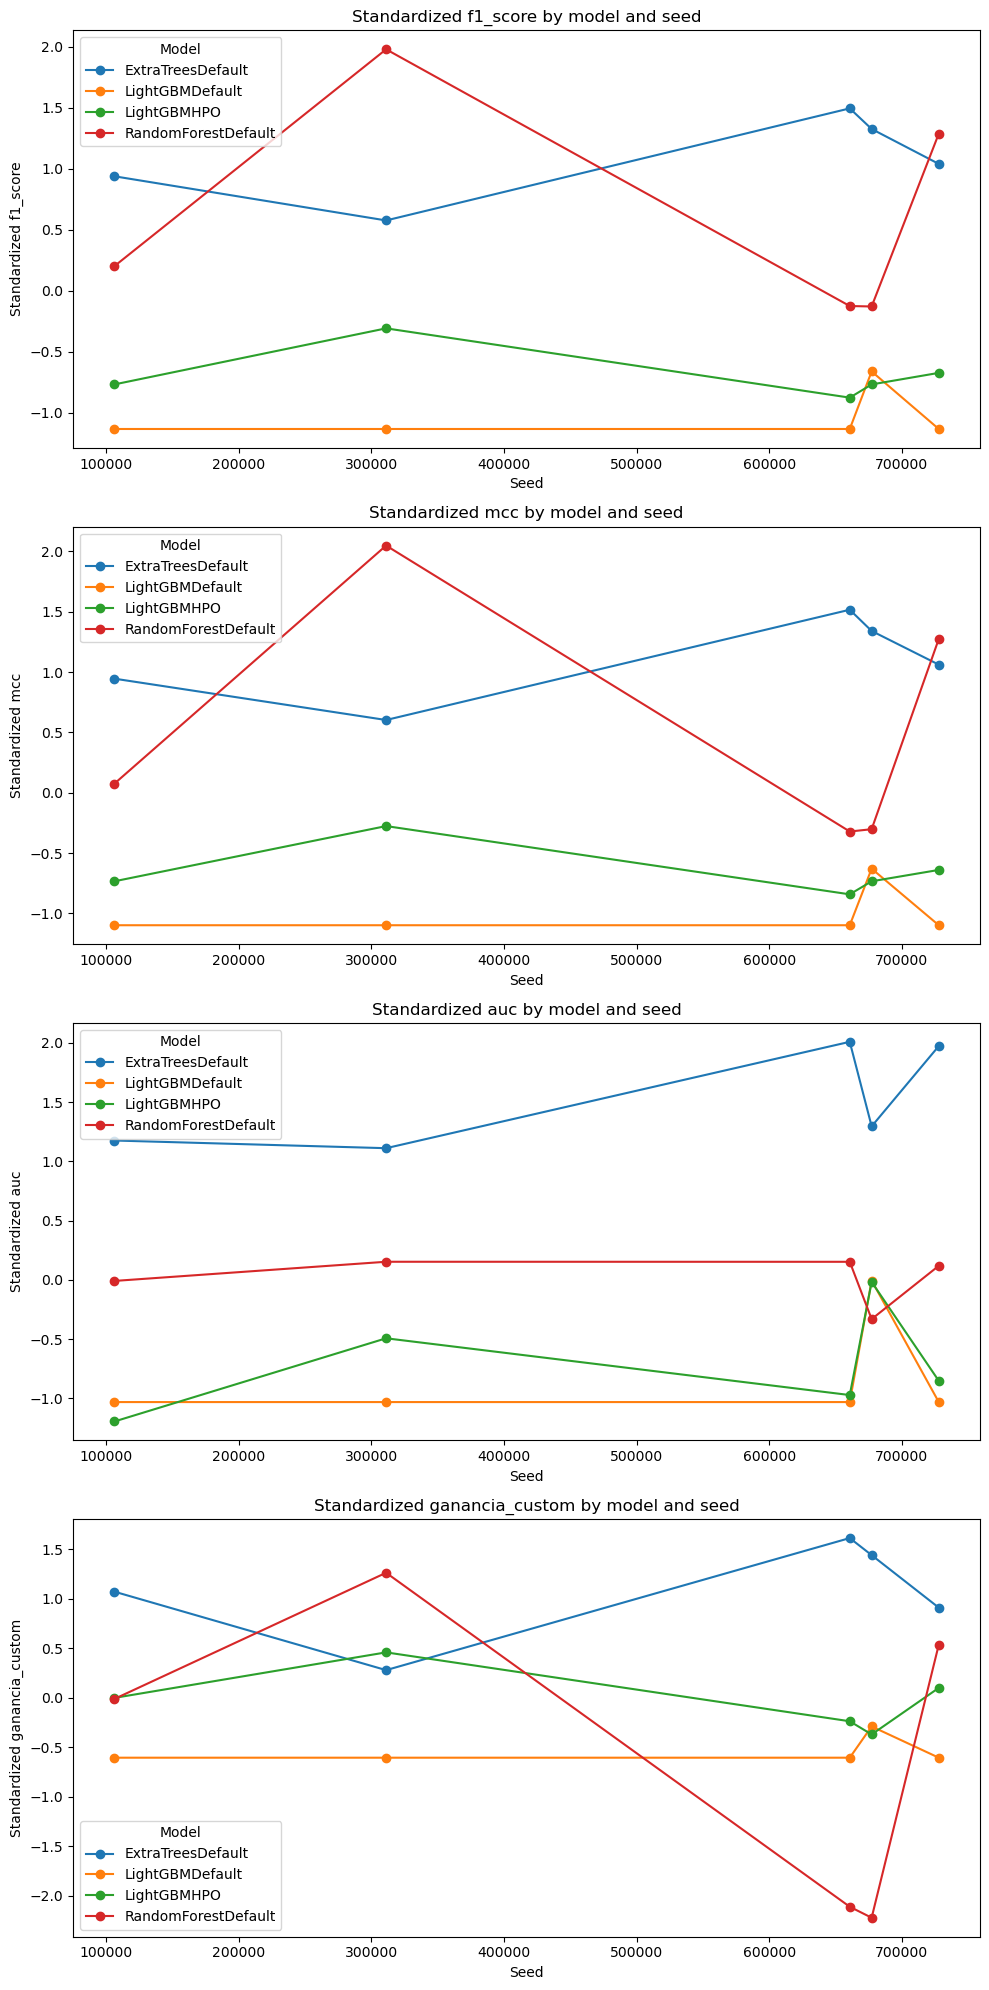

model           LightGBMDefault           ExtraTreesDefault            \
value            sp_correlation   p-value    sp_correlation   p-value   
f1_score              -0.181369  0.770346         -0.820783  0.088587   
mcc                   -0.181369  0.770346         -0.820783  0.088587   
auc                    0.707107  0.181690         -0.200000  0.747060   
ganancia_custom       -0.353553  0.559404          0.600000  0.284757   

model           RandomForestDefault            
value                sp_correlation   p-value  
f1_score                   0.820783  0.088587  
mcc                        0.974679  0.004818  
auc                       -0.100000  0.872889  
ganancia_custom           -0.600000  0.284757

In [186]:
all_datasets((1,9))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot(df, metrica):    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y=metrica, data=df)
    plt.title(f"Comparación de {metrica} entre modelos")
    plt.show()    
    
def correlacion(df, metrica):
    data_wide_1 = df[df["model"]=="LightGBM"][["seed", metrica]].rename(columns={metrica: f"{metrica}_LightGBM"})
    data_wide_2 = df[df["model"]=="ExtraTreesDefault"][["seed", metrica]].rename(columns={metrica: f"{metrica}_ExtraTrees"})
    data_wide = pd.merge(data_wide_1, data_wide_2, on="seed")
    correlation_pearson = data_wide[f"{metrica}_LightGBM"].corr(data_wide[f"{metrica}_ExtraTrees"], method='pearson')
    print(f'Pearson correlation: {correlation_pearson}')
    correlation_spearman = data_wide[f"{metrica}_LightGBM"].corr(data_wide[f"{metrica}_ExtraTrees"], method='spearman')
    print(f'Spearman correlation: {correlation_spearman}')